In [161]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
name='/users/alan/cs230/Project/FinnishLOB3.txt'
d=pd.read_fwf(name,header=None)

In [17]:
print(d.shape)
print(d.info())
d.head()

(149, 106444)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Columns: 106444 entries, 0 to 106443
dtypes: float64(106444)
memory usage: 121.0 MB
None


,0,1,2,3,4,5,6,7,8,9,...,106434,106435,106436,106437,106438,106439,106440,106441,106442,106443
0,0.302942,0.302942,0.301930,0.301930,0.301930,0.301930,0.301930,0.304964,0.304964,0.304964,...,1.303043,1.303043,1.303043,1.303043,1.303043,1.303043,1.302032,1.302032,1.302032,1.302032
1,-0.515913,-0.618919,-0.683480,-0.538400,-0.538400,-0.538400,-0.763274,-0.106062,-0.178602,-0.178602,...,-0.458606,-0.458606,-0.458606,-0.313526,-0.313526,-0.313526,-0.518089,-0.518089,-0.663169,-0.663169
2,0.298138,0.298138,0.298138,0.298138,0.298138,0.299151,0.299151,0.303202,0.303202,0.304215,...,1.303913,1.303913,1.303913,1.303913,1.303913,1.303913,1.303913,1.303913,1.304926,1.304926
3,-0.502280,-0.502280,-0.502280,-0.502280,-0.502280,-0.568519,-0.455290,-0.460385,-0.460385,-0.403771,...,-0.573614,-0.573614,-0.573614,-0.630228,-0.630228,-0.630228,-0.630228,-0.630228,-0.577577,-0.577577
4,0.304593,0.305604,0.301560,0.303582,0.303582,0.303582,0.302571,0.305604,0.304593,0.304593,...,1.302457,1.302457,1.302457,1.302457,1.302457,1.302457,1.301446,1.301446,1.301446,1.301446


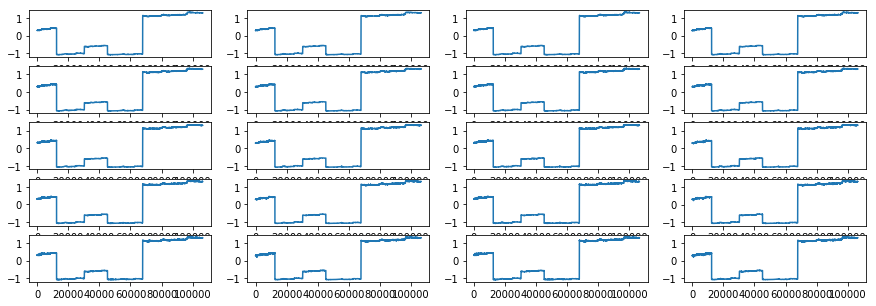

In [10]:
#plot rows containing book levels - note the breaks between the 5 stocks
fig=plt.figure(figsize=(15,5))
xaxis=np.arange(d.shape[1])
for i in range(20):
     plt.subplot(5,4,i+1)
     p=d.loc[i*2].plot()

In [85]:
#find the index of the breaks between tickers (b)
i=np.arange(d.shape[1])
b=i[d.loc[0].diff().abs()>0.2]
b=np.append(b,d.shape[1]) # add the last point
print(b)
print(np.diff(np.insert(b,0,0))) # length of each series

[ 12436  30287  45201  67818 106444]
[12436 17851 14914 22617 38626]


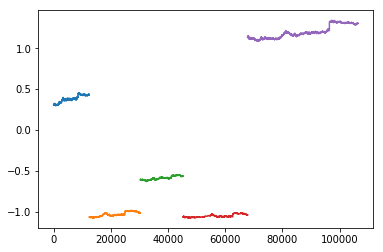

In [104]:
#print the first row broken out by ticker
start=0
for i in b:
    range=np.arange(start,i)
    plt.plot(range,d.iloc[0,range])
    start=i

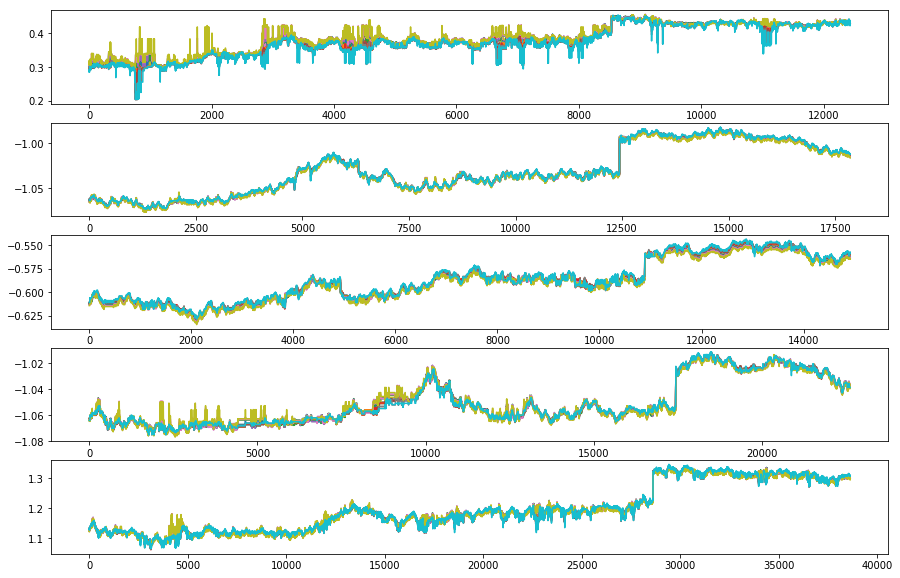

In [106]:
#plot all the bids/asks for each ticker
start=0
fig,axes=plt.subplots(5,1,figsize=(15,10))
for n,i in enumerate(b):
    x=np.arange(start,i)
    for j in np.arange(20):
        axes[n].plot(x-start,d.iloc[j*2,x])
    start=i

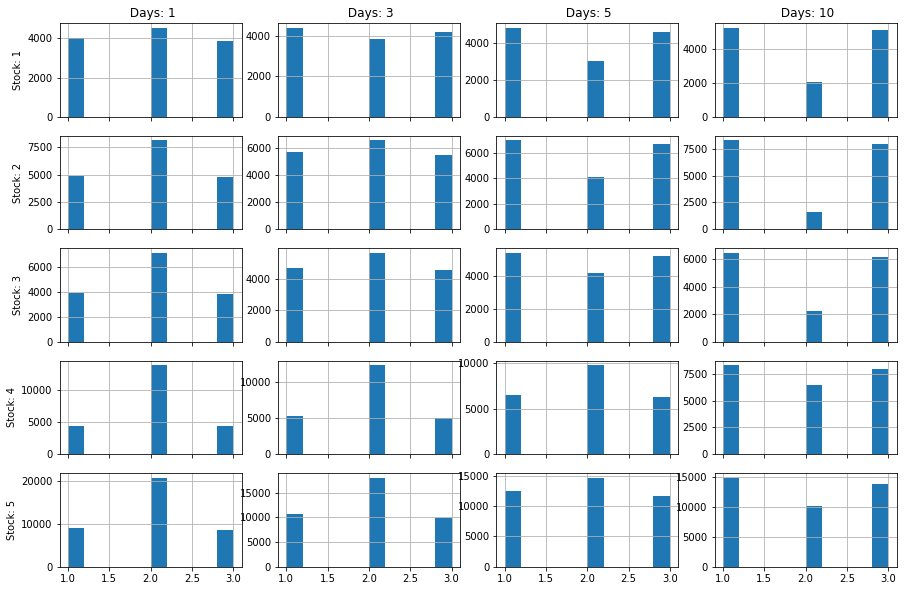

In [55]:
#histogram of 4 targets for each of 5 stocks
#notice that the number of unchange entries (value 2) declines as we go from 1 day to 10-days
start=0
horizon=[1,3,5,10]
fig,axes=plt.subplots(5,4,figsize=(15,10),sharex=True)
for m,i in enumerate(b):
    x=np.arange(start,i)
    for n,j in enumerate([145,146,147,148]):     
        d.loc[j][start:i].hist(ax=axes[m,n])
        if m==0:
            axes[0,n].set_title(' Days: '+ str(horizon[n]))
        if n==0:
            axes[m,n].set_ylabel('Stock: '+str(m+1))
    start=i

In [57]:
# Create multinomial logistic regression object
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [174]:
#start with one stock; train on 80% of data; test on 20%
sample = b[0]
t=int(.8*sample)
Xtrain=d.iloc[0:144,0:t]
Ytrain=d.iloc[145:149,0:t]
Xtest=d.iloc[0:144,t:sample]
Ytest=d.iloc[145:149,t:sample]

print(t,b[0])
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

9948 12436
(144, 9948)
(4, 9948)
(144, 2488)
(4, 2488)


In [175]:
 for i in np.arange(4):   
    # Train model - We need to transpose data so that shape is: number of (examples x features)
    model = clf.fit(Xtrain.values.T, Ytrain.iloc[i].values)

    # How well have we done on training data
    print ("Training ", i)
    print(confusion_matrix(model.predict(Xtrain.values.T),Ytrain.iloc[i].values))
    print(classification_report(model.predict(Xtrain.values.T),Ytrain.iloc[i].values))

    # How well have we done on test data
    print("Test ", i)
    print(confusion_matrix(model.predict(Xtest.values.T),Ytest.iloc[i].values))
    print(classification_report(model.predict(Xtest.values.T),Ytest.iloc[i].values))

Training  0
[[1300  587  759]
 [1221 2415  997]
 [ 791  526 1352]]
             precision    recall  f1-score   support

        1.0       0.39      0.49      0.44      2646
        2.0       0.68      0.52      0.59      4633
        3.0       0.44      0.51      0.47      2669

avg / total       0.54      0.51      0.52      9948

Test  0
[[284 279 243]
 [263 561 279]
 [157 169 253]]
             precision    recall  f1-score   support

        1.0       0.40      0.35      0.38       806
        2.0       0.56      0.51      0.53      1103
        3.0       0.33      0.44      0.37       579

avg / total       0.45      0.44      0.44      2488

Training  1
[[1792  776 1012]
 [ 844 1588  744]
 [ 973  652 1567]]
             precision    recall  f1-score   support

        1.0       0.50      0.50      0.50      3580
        2.0       0.53      0.50      0.51      3176
        3.0       0.47      0.49      0.48      3192

avg / total       0.50      0.50      0.50      9948

Test  1
